In [1]:
#importing libraries
import numpy as np
import pandas as pd

#importing libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries used for modelbuilding
import sklearn

#libraries used to depress the warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#importing the dataset
df = pd.read_csv('CICIDS2017_sample.csv')

In [3]:
#reading first 5 rows
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
#reading last five rows
df.tail()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
56656,234,2,2,64,232,32,32,32.00,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.00,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.00,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.00,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS
56660,11512204,8,5,326,11632,326,0,40.75,115.258405,10184,...,32,892.0,0.0,892,892,6507197.0,0.0,6507197,6507197,DoS


In [5]:
#shape of the dataset
df.shape

(56661, 78)

In [6]:
print("Number of rows are:    ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:     56661
Number of columns are:  78


In [7]:
#datatypes of the dataset
df.dtypes

Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
Total Length of Bwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 78, dtype: object

In [8]:
#dimension of the dataset
df.ndim

2

In [9]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56661 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56661 non-null  int64  
 1   Total Fwd Packets            56661 non-null  int64  
 2   Total Backward Packets       56661 non-null  int64  
 3   Total Length of Fwd Packets  56661 non-null  int64  
 4   Total Length of Bwd Packets  56661 non-null  int64  
 5   Fwd Packet Length Max        56661 non-null  int64  
 6   Fwd Packet Length Min        56661 non-null  int64  
 7   Fwd Packet Length Mean       56661 non-null  float64
 8   Fwd Packet Length Std        56661 non-null  float64
 9   Bwd Packet Length Max        56661 non-null  int64  
 10  Bwd Packet Length Min        56661 non-null  int64  
 11  Bwd Packet Length Mean       56661 non-null  float64
 12  Bwd Packet Length Std        56661 non-null  float64
 13  Flow Bytes/s    

In [10]:
#statistics of the data
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.666100e+04,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,...,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04
mean,1.940740e+07,5.893348,5.441168,7.325051e+02,5.282417e+03,166.369390,10.105946,43.155072,57.334013,1552.609749,...,3.115794,26.955966,8.127717e+04,2.732128e+04,1.207459e+05,6.484220e+04,1.474432e+07,8.688159e+05,1.539940e+07,1.410650e+07
std,3.672377e+07,56.898685,66.513164,2.135208e+04,1.092694e+05,669.066176,47.856017,174.087067,224.747519,2773.907899,...,53.236039,6.796834,7.396278e+05,3.340568e+05,9.387816e+05,6.835563e+05,3.214172e+07,6.311718e+06,3.301473e+07,3.191101e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.200000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.889700e+04,2.000000,2.000000,3.100000e+01,7.900000e+01,20.000000,0.000000,8.666667,0.000000,46.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.813192e+06,5.000000,5.000000,2.800000e+02,4.830000e+03,195.000000,6.000000,47.625000,78.488853,1460.000000,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,6930.000000,9877.000000,2.866110e+06,2.150000e+07,23360.000000,1983.000000,5940.857143,7049.469004,11632.000000,...,5994.000000,60.000000,1.000000e+08,2.610000e+07,1.000000e+08,1.000000e+08,1.190000e+08,6.860000e+07,1.190000e+08,1.190000e+08


# Data Cleaning

**Let us check whether there are any NULL values present in it**

In [11]:
df.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

In [12]:
df.isnull().sum()!=0

Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
Total Length of Bwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                          False
Length: 78, dtype: bool

**There are 78 columns with no NULL values.Therefore there are no NULL value columns present in the dataset**

In [13]:
#target column
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

# Label Encoder

**Converts the categorical column to numerical column**

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Label'] = label.fit_transform(df['Label'])

In [15]:
df['Label'].unique()

array([0, 3, 5, 1, 4, 6, 2])

In [16]:
df['Label'].value_counts()

0    22731
3    19035
5     7946
2     2767
6     2180
1     1966
4       36
Name: Label, dtype: int64

In [17]:
# decoding it
label.inverse_transform([0, 3, 5, 1, 4, 6, 2])

array(['BENIGN', 'DoS', 'PortScan', 'Bot', 'Infiltration', 'WebAttack',
       'BruteForce'], dtype=object)

In [18]:
#dividing into dependent(target) and independent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
#count of each class in the target column
y.value_counts()

0    22731
3    19035
5     7946
2     2767
6     2180
1     1966
4       36
Name: Label, dtype: int64

**There is some irregularity. Now the model get biased because of this unbalanced data**

# Handling the UnBalanced data

In [20]:
#replacing infinity or nan value with zero if any exists
x= x.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state=0,sampling_strategy={3:22731,5:22731,2:22731,6:22731,1:22731,4:22731})
x_osam,y_osam = SM.fit_resample(x,y)

In [21]:
y_osam.value_counts()

0    22731
1    22731
2    22731
3    22731
4    22731
5    22731
6    22731
Name: Label, dtype: int64

# Train-Test-Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#dividing into train test 
x_train,x_test,y_train,y_test = train_test_split(x_osam,y_osam,test_size=0.33,random_state=25)

In [24]:
#distribution of class in the y train
y_train.value_counts()

4    15329
1    15319
2    15297
5    15228
0    15182
3    15165
6    15088
Name: Label, dtype: int64

In [25]:
x_osam_train = x_train
y_osam_train = y_train

# Feature Scaling

In [26]:
#finding numerical datatype columns or features
features = x_osam_train.dtypes[x_osam_train.dtypes!='object'].index
features

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [27]:
x_osam_train[features]=x_osam_train[features].apply(lambda x: (x - x.mean())/(x.std()))

In [28]:
#first 5 rows or records
x_osam_train.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
142258,-0.312210,-0.189112,-0.188178,-0.178344,-0.040975,0.313776,-0.154329,0.262037,0.786867,-0.172092,...,-0.189469,0.744089,-0.205955,-0.146416,-0.203591,-0.197716,-0.396536,-0.260515,-0.423070,-0.358284
101138,-0.113591,-0.157323,-0.157994,-0.150813,-0.044043,0.699952,0.040485,0.671216,0.921621,-0.355858,...,-0.154505,-1.072977,1.087754,-0.146416,0.710862,1.559081,0.116291,-0.260515,0.048581,0.173209
99611,2.086132,-0.189112,-0.185001,-0.179167,0.113535,0.054658,-0.154329,0.027604,0.304299,1.859535,...,-0.189469,-1.072977,-0.205955,-0.146416,-0.203591,-0.197716,3.629472,-0.260515,3.279674,3.814264
50586,-0.548483,-0.192291,-0.194533,-0.180302,-0.045983,-0.288498,-0.154329,-0.295786,-0.326387,-0.357900,...,-0.191059,0.744089,-0.205955,-0.146416,-0.203591,-0.197716,-0.396536,-0.260515,-0.423070,-0.358284
19274,-0.548482,-0.193881,-0.192944,-0.180302,-0.045983,-0.288498,-0.154329,-0.295786,-0.326387,-0.357900,...,-0.191059,0.744089,-0.205955,-0.146416,-0.203591,-0.197716,-0.396536,-0.260515,-0.423070,-0.358284


#  Feature Extraction

**We are PCA On the features to reduce the count of features but not the information contained by them**

In [29]:
x_osam_train= x_osam_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_osam_train,y_osam_train)
x_train = pca.transform(x_osam_train)

In [31]:
x_train = pd.DataFrame(data=x_train,columns=["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9","Comp10"])
y_train = y_osam_train

In [32]:
x_train.shape

(106608, 10)

In [33]:
y_train.shape

(106608,)

# Model Building

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

# Model Evaluation

In [35]:
x_test[features]=x_test[features].apply(lambda x: (x - x.mean())/(x.std()))
x_test = x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
x_test = pca.transform(x_test)

In [36]:
y_pred_test = model.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
confusion_matrix(y_pred_test,y_test)

array([[7262, 2200,  740, 1053,   60, 2801,  273],
       [  74, 5211,    3,    1,    0,    0,    0],
       [  55,    0, 6647,    3,    0,    3,  122],
       [  66,    0,    4, 6506,    0,    4,    3],
       [  30,    1,    0,    0, 7342,    0,    0],
       [   9,    0,    0,    1,    0, 4694,    0],
       [  53,    0,   40,    2,    0,    1, 7245]], dtype=int64)

In [39]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66     14389
           1       0.70      0.99      0.82      5289
           2       0.89      0.97      0.93      6830
           3       0.86      0.99      0.92      6583
           4       0.99      1.00      0.99      7373
           5       0.63      1.00      0.77      4704
           6       0.95      0.99      0.97      7341

    accuracy                           0.86     52509
   macro avg       0.85      0.92      0.87     52509
weighted avg       0.89      0.86      0.84     52509



In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_test,y_test))

0.8552248186025253


# Elbow Method

In [41]:
errors = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    error = np.mean(y_pred!=y_test)
    errors.append(error)

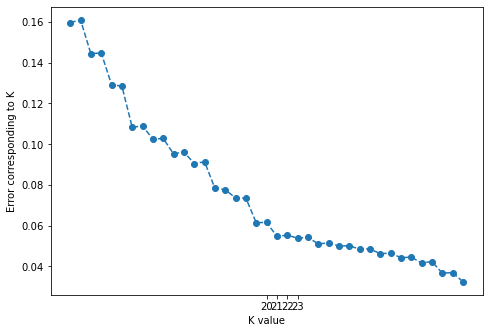

In [42]:
#plotting a graph for the errors
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(1,40),errors,linestyle='dashed',marker='o')
plt.xticks([20,21,22,23])
plt.xlabel("K value")
plt.ylabel("Error corresponding to K")
plt.show()

**Model Building with thes Best parameters**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [44]:
y_pred_test = model.predict(x_test)

In [45]:
confusion_matrix(y_pred_test,y_test)

array([[6848,  581,   68,  444,   44,  688,   52],
       [ 193, 6829,    2,    1,    2,    0,    0],
       [ 125,    0, 7348,   10,    0,    0,  246],
       [ 127,    0,    8, 7105,    0,    3,    2],
       [  96,    2,    2,    2, 7356,    5,    0],
       [  70,    0,    4,    1,    0, 6806,    0],
       [  90,    0,    2,    3,    0,    1, 7343]], dtype=int64)

In [46]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      8725
           1       0.92      0.97      0.95      7027
           2       0.99      0.95      0.97      7729
           3       0.94      0.98      0.96      7245
           4       0.99      0.99      0.99      7463
           5       0.91      0.99      0.95      6881
           6       0.96      0.99      0.97      7439

    accuracy                           0.95     52509
   macro avg       0.95      0.95      0.95     52509
weighted avg       0.95      0.95      0.94     52509



In [47]:
accuracy_score(y_pred_test,y_test)

0.9452665257384448

**Previously the Accuracy was 0.8552248186025253 and Now it was 0.9452665257384448. So the model performance has improved by k value**